In [55]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [162]:
data = pd.read_csv("C:\\Users\\Public\\Documents\\banana_quality.csv")
data.head()

#banana is purchased if sweetness > 1

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality,Purchased
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good,0
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good,0


In [163]:
y = data["Purchased"].to_numpy()

In [164]:
X = data.iloc[:, [2,3]].to_numpy()
print(X)

[[ 3.0778325  -1.4721768 ]
 [ 0.34692144 -2.4950993 ]
 [ 1.5684522  -2.6451454 ]
 ...
 [-2.532364    0.96497643]
 [-1.0080286   2.126946  ]
 [ 0.15902641  1.4997064 ]]


In [165]:
X_train, X_tv, Y_train, Y_tv = train_test_split(X, y, test_size=0.2)

In [166]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_tv, Y_tv, test_size=0.5)

In [167]:
scaler = StandardScaler()

In [168]:
X_train = scaler.fit_transform(X_train)

In [169]:
X_test = scaler.transform(X_test)

In [170]:
X_valid = scaler.transform(X_valid)

In [171]:
len(X_train), len(X_test)

(6400, 800)

In [172]:
len(Y_train), len(Y_test)

(6400, 800)

In [173]:
N, D = X_train.shape

In [174]:
K = 1

In [175]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((D,)),
    tf.keras.layers.Dense(K, activation="sigmoid")
])

In [176]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [177]:
r = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=50)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3223 - loss: 0.8894 - val_accuracy: 0.4512 - val_loss: 0.8055
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5075 - loss: 0.7655 - val_accuracy: 0.6538 - val_loss: 0.6924
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7125 - loss: 0.6527 - val_accuracy: 0.7775 - val_loss: 0.6003
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: 0.5741 - val_accuracy: 0.8175 - val_loss: 0.5256
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.5033 - val_accuracy: 0.8175 - val_loss: 0.4651
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8237 - loss: 0.4467 - val_accuracy: 0.8325 - val_loss: 0.4162
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8500 - loss: 0.3962 - val_accuracy: 0.8587 - val_loss: 0.3758
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8825 - loss: 0.3560 - val_accuracy: 0.

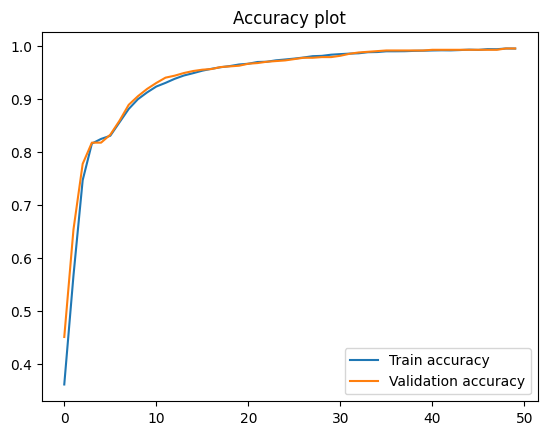

In [178]:
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend();

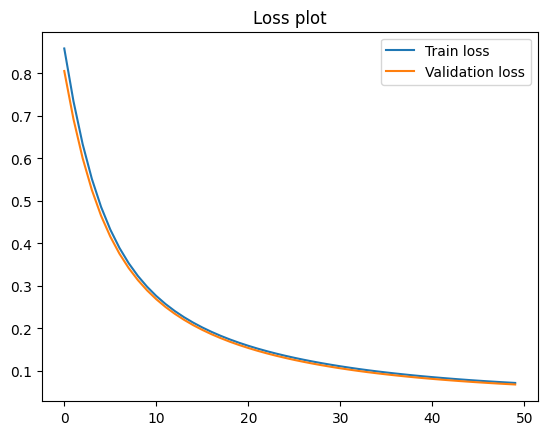

In [179]:
plt.plot(r.history["loss"], label="Train loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.title("Loss plot")
plt.legend();

In [181]:
print(f"Train classification rate: {r.history['accuracy'][-1]*100:.02f}%")

Train classification rate: 99.48%


In [182]:
print(f"Train loss: {r.history['loss'][-1]}%")

Train loss: 0.07192221283912659%


In [183]:
evaluation = model.evaluate(X_test, Y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9911 - loss: 0.0719


In [184]:
print(f"Test classification rate: {evaluation[1] * 100:.02f}%")

Test classification rate: 99.12%


In [185]:
print(f"Test loss: {evaluation[0]}")

Test loss: 0.07334981858730316


In [186]:
Y_pred = np.round(model.predict(X_test))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [187]:
confusion_matrix = confusion_matrix(Y_pred, Y_test) 

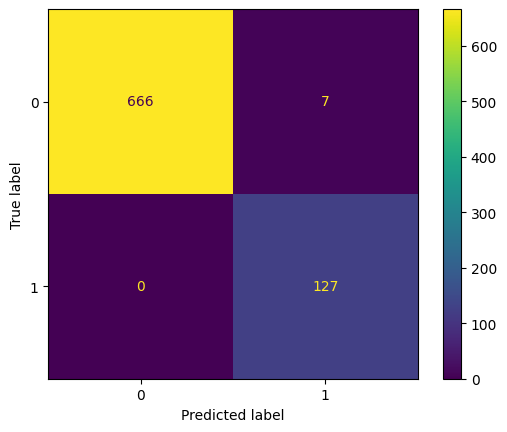

In [188]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot();